In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# Stock

In [34]:
data = pd.read_excel('gulf.xlsx')

In [35]:
data.head()

,Date,Prior,Open,High,Low,Close,P/E,PEG,P/BV
0,2019-01-01,16.12,16.02,17.25,15.77,17.20,53.69,1.57,5.13
1,2019-02-01,17.20,17.15,18.59,16.96,17.90,63.76,-5.20,5.28
2,2019-03-01,17.90,17.90,19.28,17.30,18.88,67.28,-5.49,5.58
3,2019-04-01,18.88,18.93,20.96,18.93,20.66,73.62,-6.00,6.10
4,2019-05-01,20.66,20.56,21.36,18.88,20.37,84.09,-2.37,5.83


In [36]:
df = data[['Date','Close','P/E','P/BV']].set_index('Date')

In [42]:
df['Ret'] = df.Close.pct_change()

In [43]:
df.head(50)

,Close,P/E,P/BV,Ret
Date,,,,
2019-01-01,17.20,53.69,5.13,NaN
2019-02-01,17.90,63.76,5.28,0.040698
2019-03-01,18.88,67.28,5.58,0.054749
2019-04-01,20.66,73.62,6.10,0.094280
2019-05-01,20.37,84.09,5.83,-0.014037
2019-06-01,24.32,100.42,6.96,0.193913
2019-07-01,25.01,103.27,7.16,0.028372
2019-08-01,28.67,66.46,8.41,0.146341
2019-09-01,31.64,73.33,9.28,0.103593


In [45]:
X = df.iloc[1:, 1:3]
y = df.iloc[1:, -1]

In [46]:
X

,P/E,P/BV
Date,,
2019-02-01,63.76,5.28
2019-03-01,67.28,5.58
2019-04-01,73.62,6.10
2019-05-01,84.09,5.83
2019-06-01,100.42,6.96
2019-07-01,103.27,7.16
2019-08-01,66.46,8.41
2019-09-01,73.33,9.28
2019-10-01,74.25,9.40


In [47]:
scaler = preprocessing.StandardScaler().fit(X)

In [48]:
X_scaled = scaler.transform(X)
X_scaled

array([[-1.26421224, -1.06384109],
       [-1.08604486, -0.97177792],
       [-0.76514113, -0.81220175],
       [-0.23519443, -0.89505861],
       [ 0.59136046, -0.54828733],
       [ 0.73561529, -0.48691188],
       [-1.12754976, -0.10331534],
       [-0.77981969,  0.16366786],
       [-0.73325322,  0.20049313],
       [-0.51509942,  0.20969945],
       [-0.53888881,  0.19128681],
       [ 0.09178319,  0.65160267],
       [-0.83448468,  0.13604891],
       [-1.17715318, -0.12786552],
       [-0.21039272,  0.61784617],
       [ 1.91648029,  2.22588289],
       [ 1.91648029,  2.22588289],
       [ 1.23721718,  1.70726036],
       [ 0.91833808,  1.89752425],
       [ 0.74624459,  1.75022318],
       [ 0.40306994,  1.4586898 ],
       [ 1.7266713 , -0.52680592],
       [ 1.59355193, -0.57283751],
       [ 1.46043255, -0.61886909],
       [ 0.120128  , -0.81527053],
       [ 0.1545467 , -0.79992666],
       [ 0.2932338 , -0.74468876],
       [-1.3239388 , -0.95643406],
       [-1.27686617,

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12)

In [50]:
model = LinearRegression()

In [51]:
reg = model.fit(X_train, y_train)

In [52]:
y_pred = model.predict(X_test)

In [53]:
print('Score = ', metrics.r2_score(y_test,y_pred))

Score =  -0.4504732077143194


In [54]:
m = model.coef_
b = model.intercept_

In [55]:
m

array([ 0.02747628, -0.04176782])

In [56]:
b

0.021330449987719227

In [57]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.10960263423612815
MSE =  0.019788641998141367
RMSE =  0.14067210810299732


In [58]:
df_report = pd.DataFrame({'Actually': y_test, 'Predicted':y_pred})

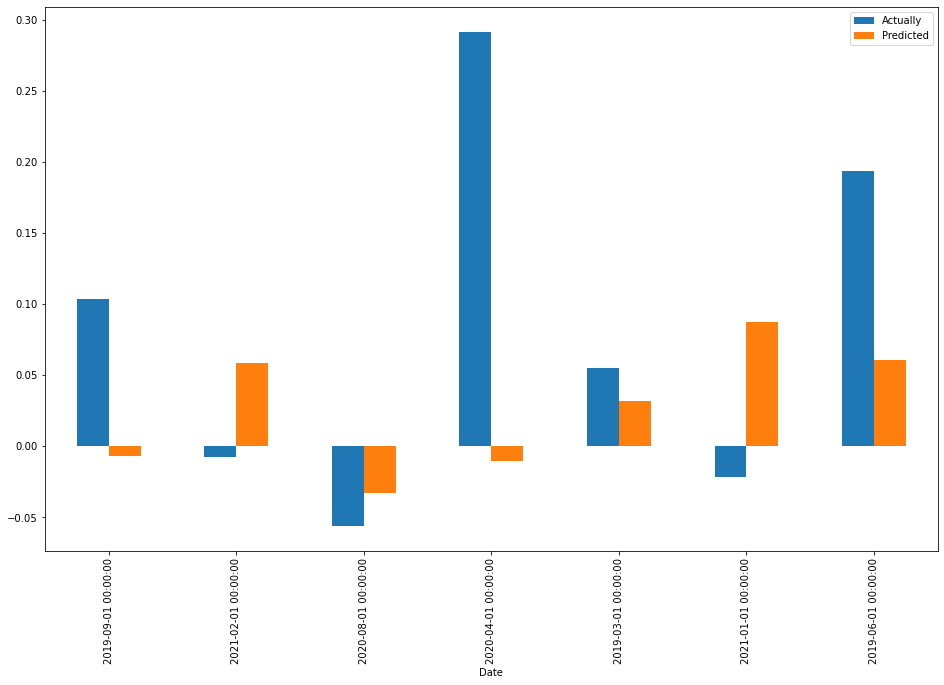

In [59]:
df1 = df_report.head(20)
df1.plot(kind="bar",figsize=(16,10))
plt.show()

# Forex

In [13]:
import pandas_ta as ta

In [9]:
start = '2022-01-01'
end = '2023-01-01'

In [10]:
data = yf.download('EURUSD=X', start=start, end=end, interval='1h')

[*********************100%***********************]  1 of 1 completed


In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
2022-01-03 00:00:00,1.137656,1.138045,1.136493,1.136622,1.136622,0
2022-01-03 01:00:00,1.136880,1.137268,1.135332,1.136105,1.136105,0
2022-01-03 02:00:00,1.136235,1.136493,1.134559,1.134559,1.134559,0
2022-01-03 03:00:00,1.134687,1.135718,1.134559,1.135203,1.135203,0
2022-01-03 04:00:00,1.135460,1.135589,1.134301,1.134430,1.134430,0
...,...,...,...,...,...,...
2022-12-30 18:00:00,1.071123,1.071582,1.070435,1.070778,1.070778,0
2022-12-30 19:00:00,1.070664,1.071352,1.069976,1.070435,1.070435,0
2022-12-30 20:00:00,1.070320,1.071352,1.069747,1.070778,1.070778,0
2022-12-30 21:00:00,1.071008,1.071352,1.070205,1.070778,1.070778,0


In [14]:
#Golden Cross
golden_strategy = ta.Strategy(
    name = 'golden_cross',
    description = 'golden_cross',
    ta = [
        {'kind':'ema','length':12},
        {'kind':'ema','length':50}
    ])

In [15]:
# macd
macd = ta.Strategy(
    name='macd',
    description='macd',
    ta = [
        {'kind':'macd'}
    ])

In [16]:
rsi = ta.Strategy(
    name='rsi',
    description='rsi',
    ta = [
        {'kind':'rsi', 'length': 14}
    ])

In [ ]:
data.ta.strategy(golden_strategy)
data.ta.strategy(macd)
data.ta.strategy(rsi)


In [19]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14
2022-01-03 00:00:00,1.137656,1.138045,1.136493,1.136622,1.136622,0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 01:00:00,1.136880,1.137268,1.135332,1.136105,1.136105,0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 02:00:00,1.136235,1.136493,1.134559,1.134559,1.134559,0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 03:00:00,1.134687,1.135718,1.134559,1.135203,1.135203,0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 04:00:00,1.135460,1.135589,1.134301,1.134430,1.134430,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 18:00:00,1.071123,1.071582,1.070435,1.070778,1.070778,0,1.068570,1.066318,0.001181,0.000382,0.000800,62.593840
2022-12-30 19:00:00,1.070664,1.071352,1.069976,1.070435,1.070435,0,1.068857,1.066479,0.001243,0.000354,0.000888,61.060882
2022-12-30 20:00:00,1.070320,1.071352,1.069747,1.070778,1.070778,0,1.069153,1.066648,0.001304,0.000333,0.000971,62.061489
2022-12-30 21:00:00,1.071008,1.071352,1.070205,1.070778,1.070778,0,1.069403,1.066810,0.001337,0.000293,0.001044,62.061489


In [22]:
def golden_cross(data):
    if (data.EMA_12 > data.EMA_50):
        return 1
    else:
        return 0
    
def macd_cross(data):
    if (data.MACD_12_26_9 > data.MACDs_12_26_9):
        return 1
    else:
        return 0
    
def rsi_cross(data):
    if (data.RSI_14 > 70) or (data.RSI_14 < 30):
        return 1
    else:
        return 0

In [23]:
data['golden_sig'] = data.apply(golden_cross,axis=1)
data['macd_sig'] = data.apply(macd_cross, axis=1)
data['rsi_sig'] = data.apply(rsi_cross, axis=1)

In [24]:
df = data[['Close','golden_sig','macd_sig','rsi_sig']]

In [25]:
df

,Close,golden_sig,macd_sig,rsi_sig
2022-01-03 00:00:00,1.136622,0,0,0
2022-01-03 01:00:00,1.136105,0,0,0
2022-01-03 02:00:00,1.134559,0,0,0
2022-01-03 03:00:00,1.135203,0,0,0
2022-01-03 04:00:00,1.134430,0,0,0
...,...,...,...,...
2022-12-30 18:00:00,1.070778,1,1,0
2022-12-30 19:00:00,1.070435,1,1,0
2022-12-30 20:00:00,1.070778,1,1,0
2022-12-30 21:00:00,1.070778,1,1,0


In [26]:
ret = df.Close.pct_change()

In [27]:
X = df.iloc[1:, 1:]
y = ret[1:]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

## Kfold

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [58]:
Kfold = KFold(10,shuffle=False,random_state=None)

In [59]:
Kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [60]:
for train,test in Kfold.split(y):
    print('train: %s,test:%s' % (y[train],y[test]))

train: 2022-02-08 00:00:00   -0.000115
2022-02-08 01:00:00   -0.000572
2022-02-08 02:00:00   -0.000572
2022-02-08 03:00:00    0.000000
2022-02-08 04:00:00   -0.000343
                         ...   
2022-12-30 18:00:00   -0.000321
2022-12-30 19:00:00   -0.000321
2022-12-30 20:00:00    0.000321
2022-12-30 21:00:00    0.000000
2022-12-30 22:00:00    0.000107
Name: Close, Length: 5566, dtype: float64,test:2022-01-03 01:00:00   -0.000454
2022-01-03 02:00:00   -0.001361
2022-01-03 03:00:00    0.000568
2022-01-03 04:00:00   -0.000681
2022-01-03 05:00:00   -0.000340
                         ...   
2022-02-07 19:00:00    0.001374
2022-02-07 20:00:00    0.000000
2022-02-07 21:00:00   -0.000114
2022-02-07 22:00:00   -0.000114
2022-02-07 23:00:00    0.000343
Name: Close, Length: 619, dtype: float64
train: 2022-01-03 01:00:00   -0.000454
2022-01-03 02:00:00   -0.001361
2022-01-03 03:00:00    0.000568
2022-01-03 04:00:00   -0.000681
2022-01-03 05:00:00   -0.000340
                         ...   
20

In [61]:
lm = LinearRegression()
score = cross_val_score(lm,X_train,y_train,scoring='r2',cv=5)
score

array([0.01380284, 0.0264497 , 0.01076822, 0.03081756, 0.01634126])

In [62]:
from numpy import mean
from numpy import std

In [63]:
print('Accuracy: %.2f (%.2f)' % (mean(score) , std(score)))

Accuracy: 0.02 (0.01)


## Non_Kfold

In [30]:
model = LinearRegression()

In [31]:
fx_reg = model.fit(X_train, y_train)

In [32]:
y_pred = fx_reg.predict(X_test)

In [33]:
print('Score = ', metrics.r2_score(y_test,y_pred))

Score =  0.009893478034155079


In [34]:
m = model.coef_
b = model.intercept_

In [35]:
print(m)
print(b)

[ 5.12020296e-05  3.85184428e-04 -4.20663891e-05]
-0.00021655901913223414


In [36]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.0009696480624690371
MSE =  2.1127122233612287e-06
RMSE =  0.00145351719059708


In [37]:
df_report = pd.DataFrame({'Actually': y_test, 'Predicted':y_pred})

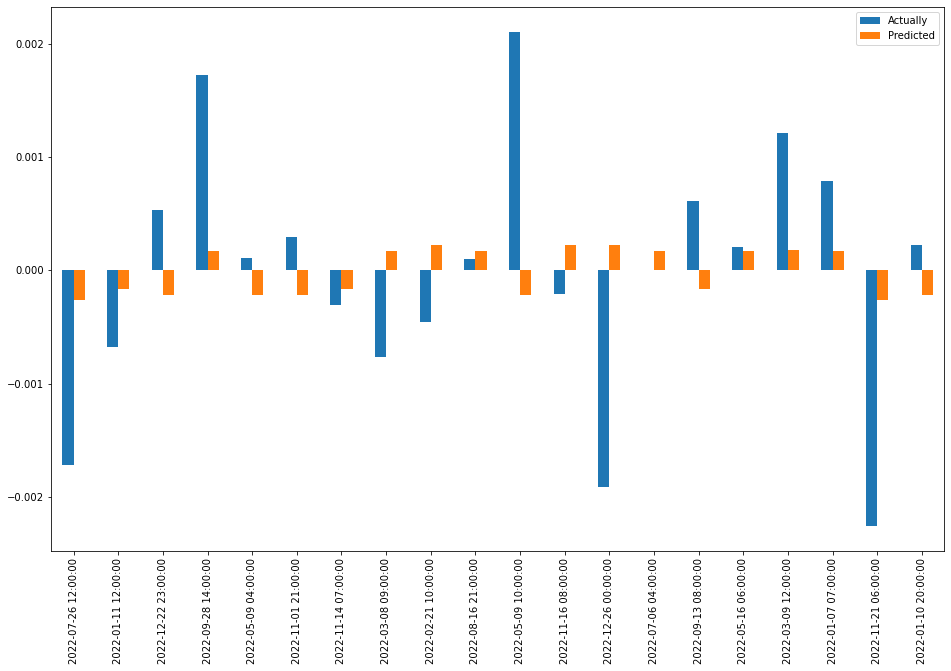

In [38]:
df1 = df_report.head(20)
df1.plot(kind="bar",figsize=(16,10))
plt.show()